# Stock Prices Predictions with LSTM 

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [51]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX
...,...,...,...,...,...,...,...
1254,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX
1255,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX
1256,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX
1257,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX


## Chapt. 1: Un metodo errato di fare previsioni

Facciamo la cosa più sbagliata possibile: usare solo le informazioni sul prezzo per provare a predirlo

In [52]:
series = df["close"].values.reshape(-1, 1)
N = len(series)
N

1259

In [53]:
scaler = StandardScaler()
scaler.fit(series[:N//2])
scaled_series = scaler.transform(series)

In [54]:
T = 10
D = 1
x = []
y = []

for t in range(N-T):
    x_t = scaled_series[t:t+T]
    x.append(x_t)
    y_t = scaled_series[t+T]
    y.append(y_t)

x = np.array(x)
y = np.array(y).reshape(-1,)

x.shape, y.shape

((1249, 10, 1), (1249,))

In [55]:
inp = Input(shape=(T, D))
out = LSTM(5)(inp)
out = Dense(1)(out)

model = Model(inp, out)
model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 5)                   │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
r = model.fit(x[:N//2], y[:N//2], validation_data=(x[N//2:], y[N//2:]), epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.6709 - val_loss: 1.1967
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0954 - val_loss: 0.3871
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0358 - val_loss: 0.1691
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0128 - val_loss: 0.0786
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - val_loss: 0.0715
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0089 - val_loss: 0.0709
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0078 - val_loss: 0.0603
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0082 - val_loss: 0.0622
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0083 - val_loss: 0.0581
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0076 - val_loss: 0.0623
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0082 - val_loss: 0.0590
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

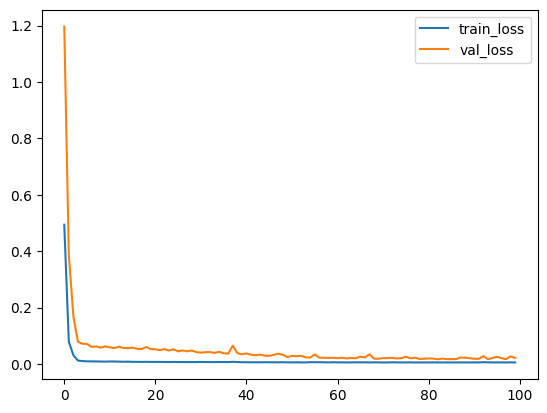

In [59]:
h = r.history
plt.plot(h["loss"], label="train_loss")
plt.plot(h["val_loss"], label="val_loss")
plt.legend()

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


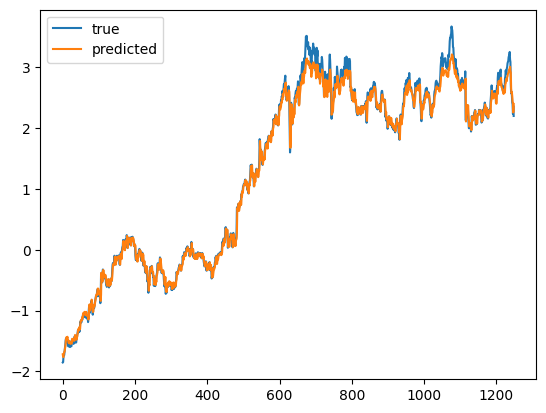

In [60]:
# One-Step Forecast=
outputs = model.predict(x)
predictions = outputs.flatten()
plt.plot(y, label="true")
plt.plot(predictions, label="predicted")
plt.legend()

In [65]:
data = np.c_[y, predictions]
df_test = pd.DataFrame(data, columns=["True", "Predicted"])
df_test.head()

,True,Predicted
0,-1.855062,-1.721718
1,-1.849965,-1.761352
2,-1.756050,-1.767210
3,-1.735665,-1.706706
4,-1.734209,-1.683402


In [69]:
df_test["True_pct"] = (df_test[["True"]].pct_change() > 0)
df_test["Predicted_pct"] = (df_test[["Predicted"]].pct_change() > 0)
df_test.head()

,True,Predicted,True_pct,Predicted_pct
0,-1.855062,-1.721718,False,False
1,-1.849965,-1.761352,False,True
2,-1.756050,-1.767210,False,True
3,-1.735665,-1.706706,False,False
4,-1.734209,-1.683402,False,False


In [73]:
df_test["accuracy"] = (df_test["True_pct"] == df_test["Predicted_pct"])
df_test.head()
df_test["accuracy"].sum() / len(df_test)

0.48839071257005606

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

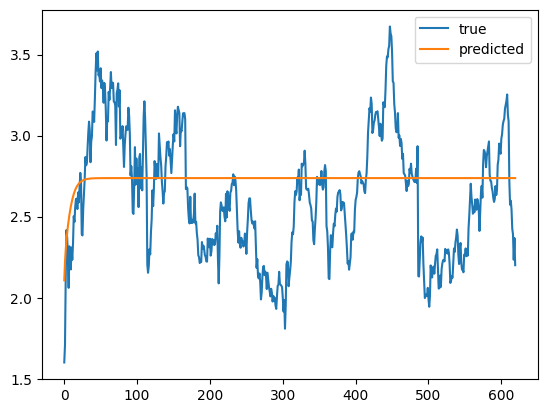

In [14]:
# Multi-step forecast:
validation_target = y[N//2:]
validation_predictions = []

last_x = x[N//2]
while len(validation_predictions) < len(validation_target):
    pred = model.predict(last_x.reshape(1, T, D))[0]
    validation_predictions.append(pred)
    last_x = np.roll(last_x, -1)
    last_x[-1] = pred

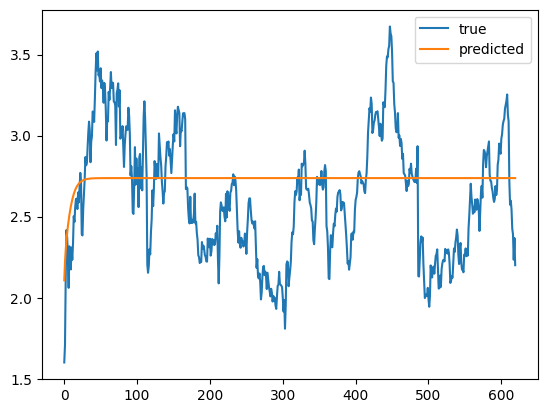

In [15]:
plt.plot(validation_target, label="true")
plt.plot(validation_predictions, label="predicted")
plt.legend();

## Chapt 2: Un altro approccio: predizione dei ritorni

In [16]:
df["prevClose"] = df["close"].shift(1)
df.head()

,date,open,high,low,close,volume,Name,prevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [18]:
df["return"] = (df["close"] - df["prevClose"]) / df["prevClose"]
df.head()

,date,open,high,low,close,volume,Name,prevClose,return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<Axes: >

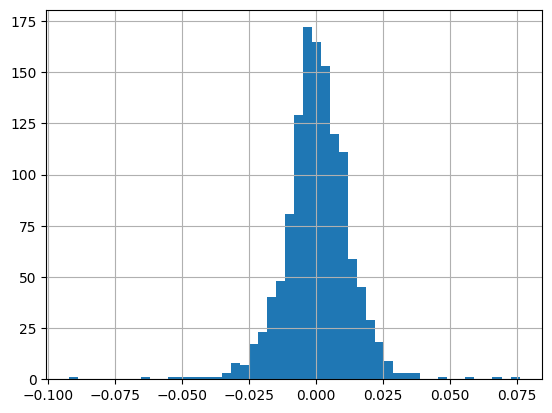

In [19]:
df["return"].hist(bins=50)

In [27]:
df = df.dropna()
series = df["return"].values.reshape(-1, 1)
N = len(series)
N

1258

In [28]:
scaler = StandardScaler()
scaler.fit(series[:N//2])
scaled_series = scaler.transform(series)

In [29]:
T = 10
D = 1
x = []
y = []

for t in range(N-T):
    x_t = scaled_series[t:t+T]
    x.append(x_t)
    y_t = scaled_series[t+T]
    y.append(y_t)

x = np.array(x)
y = np.array(y).reshape(-1,)

x.shape, y.shape

((1248, 10, 1), (1248,))

In [30]:
inp = Input(shape=(T, D))
out = LSTM(5)(inp)
out = Dense(1)(out)

model = Model(inp, out)
model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 5)                   │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
r = model.fit(x[:N//2], y[:N//2], validation_data=(x[N//2:], y[N//2:]), epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2679 - val_loss: 1.0669
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0777 - val_loss: 1.0695
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8448 - val_loss: 1.0717
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9231 - val_loss: 1.0702
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9675 - val_loss: 1.0749
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9894 - val_loss: 1.0808
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9675 - val_loss: 1.0731
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1159 - val_loss: 1.0839
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9931 - val_loss: 1.0979
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0590 - val_loss: 1.1110
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8809 - val_loss: 1.1211
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.

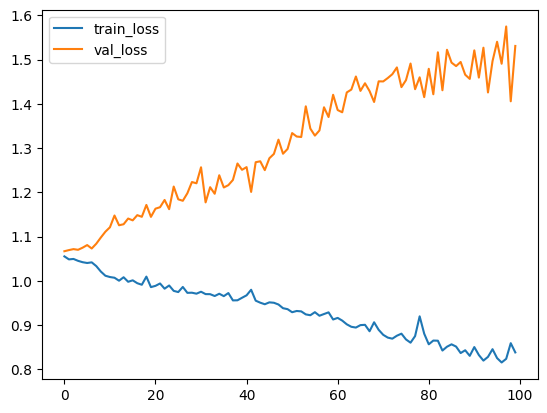

In [32]:
h = r.history
plt.plot(h["loss"], label="train_loss")
plt.plot(h["val_loss"], label="val_loss")
plt.legend()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


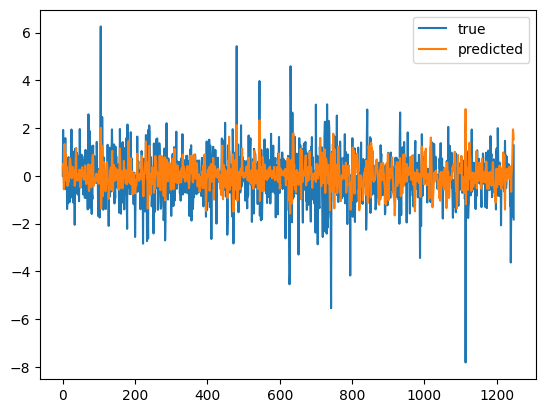

In [33]:
# One-Step Forecast
outputs = model.predict(x)
predictions = outputs.flatten()
plt.plot(y, label="true")
plt.plot(predictions, label="predicted")
plt.legend()

In [34]:
# Multi-step forecast:
validation_target = y[N//2:]
validation_predictions = []

last_x = x[N//2]
while len(validation_predictions) < len(validation_target):
    pred = model.predict(last_x.reshape(1, T, D))[0]
    validation_predictions.append(pred)
    last_x = np.roll(last_x, -1)
    last_x[-1] = pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

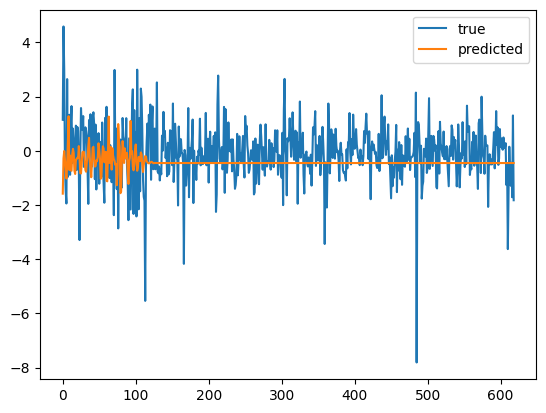

In [35]:
plt.plot(validation_target, label="true")
plt.plot(validation_predictions, label="predicted")
plt.legend();

## Chapt 3: Predizione con tutti i valori 

Questo esercizio diventa più semplice: predizione della direzione del prezzo il giorno successivo

In [37]:
inputs = df[["open", "close", "high", "low", "volume"]].values
targets = df["return"].values

In [38]:
T = 10
D = inputs.shape[1]
N = len(inputs) - T

In [39]:
n_train = N*2//3

In [41]:
scaler = StandardScaler()
scaler.fit(inputs[:n_train+T])
scaled_inputs = scaler.transform(inputs)

In [42]:
x_train = np.zeros((n_train, T, D))
y_train = np.zeros(n_train)

for t in range(n_train):
    x_train[t, :, :] = scaled_inputs[t:t+T]
    y_train[t] = (targets[t+T] > 0)

In [43]:
x_test = np.zeros((N-n_train, T, D))
y_test = np.zeros(N-n_train)

for t in range(N-n_train):
    i = n_train+t
    x_test[t, :, :] = scaled_inputs[i:i+T]
    y_test[t] = (targets[i+T] > 0)

In [45]:
inp = Input(shape=(T, D))
out = LSTM(50, return_sequences=True)(inp)
out = GlobalMaxPooling1D()(out)
out = Dense(1, activation="sigmoid")(out)

model = Model(inp, out)
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 10, 5)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 10, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 50)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)
h = r.history

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5302 - loss: 0.6909 - val_accuracy: 0.4663 - val_loss: 0.6944
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5411 - loss: 0.6921 - val_accuracy: 0.4904 - val_loss: 0.6935
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5204 - loss: 0.6929 - val_accuracy: 0.4880 - val_loss: 0.6961
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5463 - loss: 0.6878 - val_accuracy: 0.4928 - val_loss: 0.6944
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5247 - loss: 0.6903 - val_accuracy: 0.5072 - val_loss: 0.6922
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5428 - loss: 0.6886 - val_accuracy: 0.4904 - val_loss: 0.6971
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5231 - loss: 0.6898 - val_accuracy: 0.5048 - val_loss: 0.6931
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5408 - loss: 0.6864 - val_accuracy: 0.5024 - 

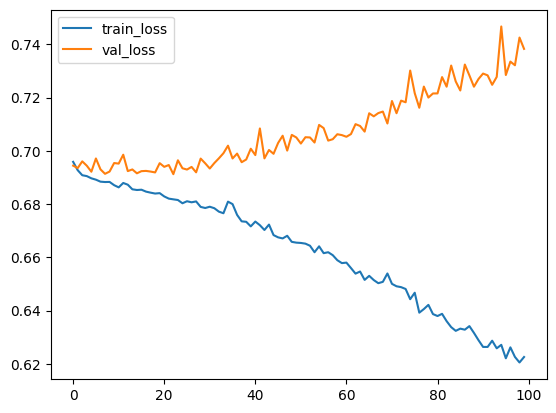

In [47]:
plt.plot(h["loss"], label="train_loss")
plt.plot(h["val_loss"], label="val_loss")
plt.legend()

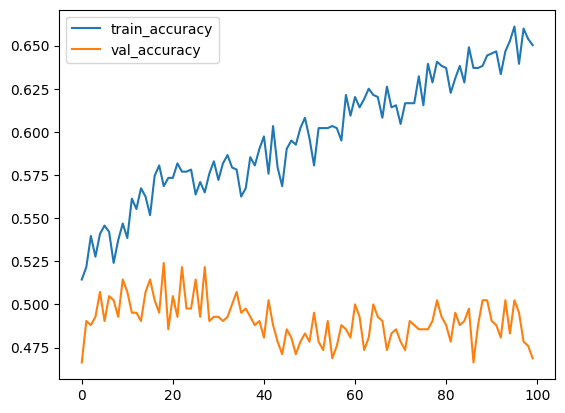

In [48]:
plt.plot(h["accuracy"], label="train_accuracy")
plt.plot(h["val_accuracy"], label="val_accuracy")
plt.legend()